# Markov Process Example

This is an example solution to Section 2.1 problems 29 and 30 in Strang's Intro to Linear Algebra, 5th edition.

### Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Create matrix `A`.

In [2]:
A = np.array([[.8, .3], [.2, .7]])

Create start vector `[1, 0]`.

In [3]:
start1 = np.array([1, 0])

Create dictionary to hold result vectors from the stages of the markov process. Initialize the dictionary with the start vector `start1`.

In [4]:
U = {'u0': start1}

Use a `for` loop to multiply the markov matrix $A$ by $u_0$, then multiply the result by $u_1$, i.e., $(Au_0)u_1$, etc. till $((((Au_0)u_1) \cdots )u_7)$. Store each result in the dictionary `U` with appropriate key value. 

In [5]:
for i in range(1, 8):
    # define dict index
    u_previous = 'u' + str(i - 1)
    u_current = 'u' + str(i)
    U[u_current] = np.dot(A, U[u_previous])

Create a `start2` vector.

In [6]:
start2 = np.array([0, 1])

Create a dictionary `V` to hold the result vectors from the stages of the markov process. Initialize with start vector `start2`.

In [7]:
V = {'v0': start2}

Use a `while` loop this time to achieve the same results as `U`, but with the starting vector `start2`. Store the results in the dictionary `V`.

In [8]:
i = 1
while len(V) <= 7:
    v_previous = 'v' + str(i - 1)
    v_current = 'v' + str(i)
    i += 1
    V[v_current] = np.dot(A, V[v_previous])

Convert the dictionaries `U` and `V` to `pandas` dataframes and take their transpose. This data structure will make plotting the resultant vectors easier.

In [9]:
U_df = pd.DataFrame(U, index=['x', 'y'])
V_df = pd.DataFrame(V, index=['x', 'y'])
U_df = U_df.transpose()
V_df = V_df.transpose()

Let's take a look at `U_df` and `V_df` to see what we have so far.

In [10]:
U_df

,x,y
u0,1.000000,0.000000
u1,0.800000,0.200000
u2,0.700000,0.300000
u3,0.650000,0.350000
u4,0.625000,0.375000
u5,0.612500,0.387500
u6,0.606250,0.393750
u7,0.603125,0.396875


In [11]:
V_df

,x,y
v0,0.000000,1.000000
v1,0.300000,0.700000
v2,0.450000,0.550000
v3,0.525000,0.475000
v4,0.562500,0.437500
v5,0.581250,0.418750
v6,0.590625,0.409375
v7,0.595312,0.404687


Now we will plot the data using the `scatterplot` function from the `seaborn` library. The Blue dots are the endpoints of the result vectors from the markov process staring with the vector `[1, 0]`. The organge dots are the result of starting with the vector `[0, 1]`. What do the dots tell us that the markov process is doing?

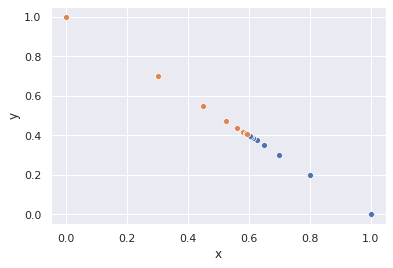

In [12]:
sns.set(style="darkgrid")
U_graph = sns.scatterplot(x='x', y='y', data=U_df)
V_graph = sns.scatterplot(x='x', y='y', data=V_df)